# Example 01: General Use of BinaryClassificationMetrics

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/metrics/example_01_BinaryClassificationMetrics.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.metrics import BinaryClassificationMetrics

_____
# BinaryClassificationMetrics Docstring

In [5]:
help(BinaryClassificationMetrics)

Help on class BinaryClassificationMetrics in module slickml.metrics:

class BinaryClassificationMetrics(builtins.object)
 |  BinaryClassificationMetrics(y_true, y_pred_proba, threshold=None, average_method=None, precision_digits=None, display_df=True)
 |  
 |  Binary Classification Metrics.
 |  This is wrapper to calculate all the binary classification
 |  metrics with both arbitrary and three computed methods for
 |  calculating the thresholds. Threshold computations including:
 |  1) Youden Index: (https://en.wikipedia.org/wiki/Youden%27s_J_statistic).
 |  2) Maximizing Precision-Recall.
 |  3) Maximizing Sensitivity-Specificity.
 |  
 |  Parameters
 |  ----------
 |  y_true: numpy.array[int] or list[int]
 |      List of ground truth binary values [0, 1]
 |  
 |  y_pred_proba: numpy.array[float] or list[float]
 |      List of predicted probability for the positive class
 |      (class=1 or y_pred_proba[:, 1] in scikit-learn)
 |  
 |  threshold: float, optional (default=0.5)
 |      T

### Example 1

In [6]:
# y_true values
y_true = [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
          1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
          1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
          1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
          1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
          1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
          1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
          1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
          1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]

# Y_pred_proba values
y_pred_proba = [0.  , 0.12, 0.78, 0.07, 1.  , 0.05, 1.  , 0.  , 1.  , 0.  , 1.  ,
                0.99, 0.93, 0.88, 0.86, 1.  , 0.99, 1.  , 1.  , 0.74, 0.  , 1.  ,
                1.  , 0.79, 1.  , 0.58, 1.  , 0.95, 1.  , 1.  , 1.  , 0.38, 1.  ,
                0.94, 1.  , 1.  , 1.  , 0.01, 0.81, 1.  , 0.99, 1.  , 0.4 , 1.  ,
                1.  , 1.  , 0.9 , 0.06, 0.  , 0.02, 0.99, 0.45, 1.  , 1.  , 0.52,
                0.99, 0.02, 0.  , 1.  , 0.04, 0.19, 0.99, 0.  , 0.  , 0.11, 1.  ,
                1.  , 0.31, 1.  , 0.25, 0.  , 0.  , 0.99, 1.  , 0.01, 0.09, 0.  ,
                1.  , 0.98, 0.  , 0.6 , 0.1 , 1.  , 1.  , 0.  , 1.  , 0.96, 0.02,
                1.  , 0.84, 1.  , 0.97, 0.01, 0.99, 0.4 , 0.  , 0.18, 1.  , 1.  ,
                1.  , 0.96, 0.04, 1.  , 0.17, 1.  , 0.96, 1.  , 0.  , 1.  , 0.06,
                1.  , 0.75, 0.64, 0.74, 0.5 , 0.97, 0.11, 0.9 , 0.  , 0.15, 1.  ,
                0.11, 1.  , 0.02, 1.  , 0.27, 0.95, 0.91, 0.99, 0.  , 1.  , 0.79,
                1.  , 1.  , 0.87, 1.  , 1.  , 0.  , 0.73, 0.97, 1.  , 0.82, 0.3 ,
                0.  , 0.09, 1.  , 1.  , 1.  , 1.  , 1.  , 0.76, 0.75, 0.99, 0.99,
                0.96, 0.01, 0.08, 0.98, 1.  , 0.  , 1.  , 1.  , 0.82, 0.04, 0.98,
                0.  , 1.  , 1.  , 0.02, 0.  , 1.  , 0.99, 1.  , 0.96, 0.  , 0.  ,
                1.  , 0.  , 1.  , 1.  , 0.  , 0.83, 0.  , 0.15, 1.  , 0.98, 0.98,
                1.  ]

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.968000,0.957000,0.988000,0.992000,0.952000,1.000000,0.991000,0.975000,0.990000,0.961000,0.952000,118,64,6,0


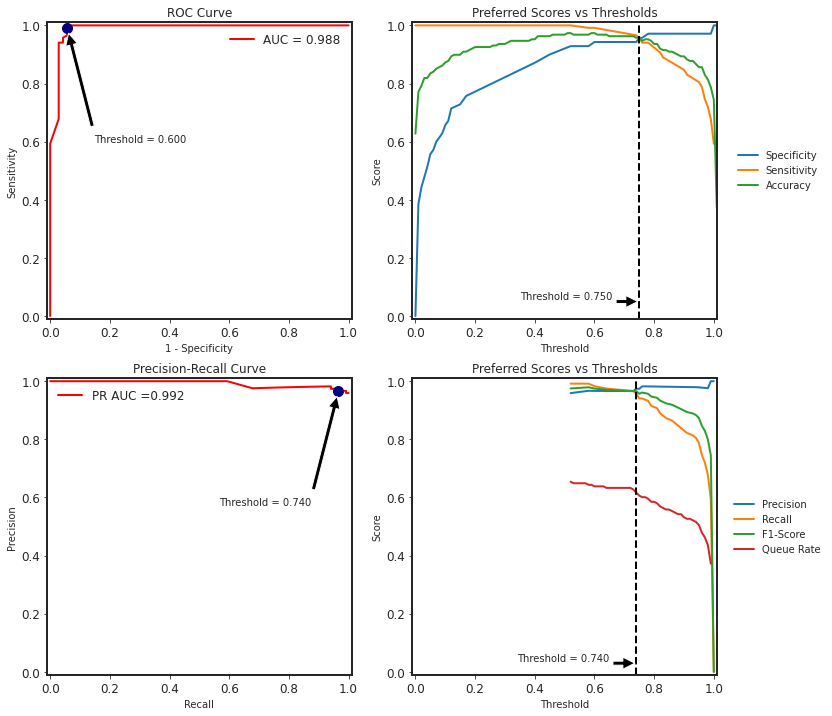

In [7]:
example1 = BinaryClassificationMetrics(y_true, y_pred_proba, precision_digits=3)
example1.plot(figsize=(12, 12),
              save_path=None)

## Example 2

Accuracy = 0.9680851063829787
Balanced Accuracy = 0.9571428571428571
AUC ROC = 0.9880750605326876
AUC PR = 0.9916378326242516
Precision = 0.9516129032258065
Recall = 1.0
F1-Score = 0.9752066115702479
F2-Score = 0.9899328859060402
F0.5-Score = 0.9609120521172638
Average Precision = 0.9906638720431951
Threat Score = 0.9516129032258065
Metrics Dict = {'Accuracy': 0.968, 'Balanced Accuracy': 0.957, 'ROC AUC': 0.988, 'PR AUC': 0.992, 'Precision': 0.952, 'Recall': 1.0, 'F-1 Score': 0.975, 'F-2 Score': 0.99, 'F-0.50 Score': 0.961, 'Threat Score': 0.952, 'Average Precision': 0.991, 'TP': 118, 'TN': 64, 'FP': 6, 'FN': 0}
Thresholds Dict = {'Youden': 0.6, 'Sensitivity-Specificity': 0.75, 'Precision-Recall-F1': 0.74}


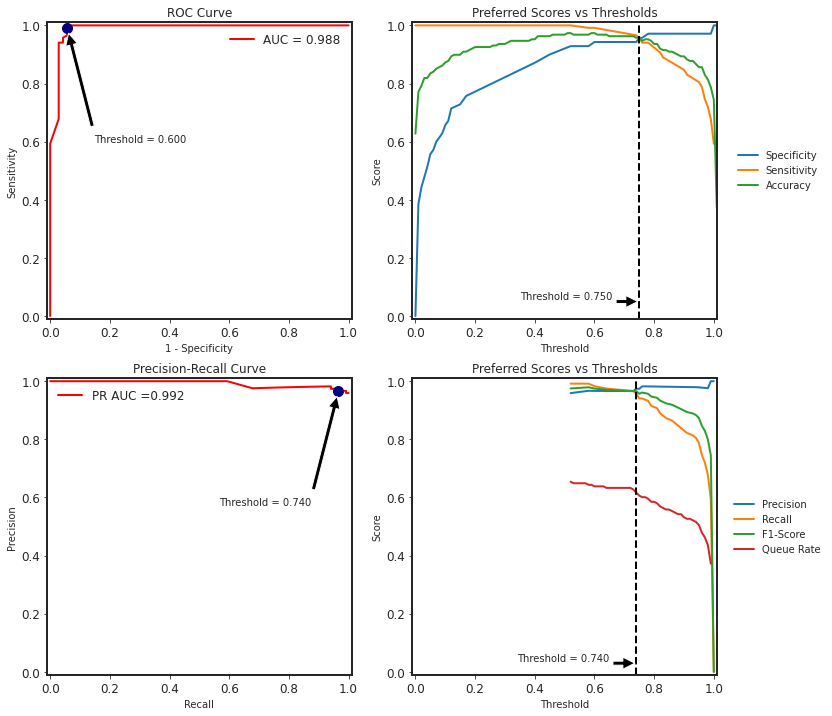

In [8]:
example = BinaryClassificationMetrics(y_true, y_pred_proba, display_df=False)

print(F"Accuracy = {example.accuracy_}")
print(F"Balanced Accuracy = {example.balanced_accuracy_}")
print(F"AUC ROC = {example.auc_roc_}")
print(F"AUC PR = {example.auc_pr_}")
print(F"Precision = {example.precision_}")
print(F"Recall = {example.recall_}")
print(F"F1-Score = {example.f1_}")
print(F"F2-Score = {example.f2_}")
print(F"F0.5-Score = {example.f05_}")
print(F"Average Precision = {example.average_precision_}")
print(F"Threat Score = {example.threat_score_}")
print(F"Metrics Dict = {example.metrics_dict_}")
print(F"Thresholds Dict = {example.thresholds_dict_}")

example.plot()

In [9]:
thresholds = example.thresholds_dict_
methods = example.average_methods_

frames = []
for method in methods:
    for threshold in thresholds:
        ex = BinaryClassificationMetrics(y_true, y_pred_proba, threshold=thresholds[threshold], average_method=method, display_df=False)
        frames.append(ex.metrics_df_)
        
df_to_show = pd.concat(frames)        

In [10]:
# Set CSS properties
th_props = [("font-size", "12px"),
            ("text-align", "left"),
            ("font-weight", "bold")]

td_props = [("font-size", "12px"),
           ("text-align", "center")]

# Set table styles
styles = [dict(selector = "th", props = th_props),
          dict(selector = "td", props = td_props)]
cm = sns.light_palette("blue", as_cmap = True)
display(df_to_show.style.background_gradient(cmap = cm) \
                        .set_table_styles(styles))

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.600 | Average = Binary,0.973000,0.967000,0.988000,0.992000,0.967000,0.992000,0.991000,0.979000,0.987000,0.972000,0.959000,117,66,4,1
Threshold = 0.750 | Average = Binary,0.957000,0.957000,0.988000,0.992000,0.974000,0.958000,0.991000,0.966000,0.961000,0.971000,0.934000,113,67,3,5
Threshold = 0.740 | Average = Binary,0.957000,0.954000,0.988000,0.992000,0.966000,0.966000,0.991000,0.966000,0.966000,0.966000,0.934000,114,66,4,4
Threshold = 0.600 | Average = Weighted,0.973000,0.967000,0.988000,0.992000,0.974000,0.973000,0.991000,0.973000,0.973000,0.973000,0.948000,117,66,4,1
Threshold = 0.750 | Average = Weighted,0.957000,0.957000,0.988000,0.992000,0.958000,0.957000,0.991000,0.958000,0.957000,0.958000,0.919000,113,67,3,5
Threshold = 0.740 | Average = Weighted,0.957000,0.954000,0.988000,0.992000,0.957000,0.957000,0.991000,0.957000,0.957000,0.957000,0.919000,114,66,4,4
Threshold = 0.600 | Average = Macro,0.973000,0.967000,0.988000,0.992000,0.976000,0.967000,0.991000,0.971000,0.969000,0.974000,0.944000,117,66,4,1
Threshold = 0.750 | Average = Macro,0.957000,0.957000,0.988000,0.992000,0.952000,0.957000,0.991000,0.955000,0.956000,0.953000,0.914000,113,67,3,5
Threshold = 0.740 | Average = Macro,0.957000,0.954000,0.988000,0.992000,0.954000,0.954000,0.991000,0.954000,0.954000,0.954000,0.913000,114,66,4,4
Threshold = 0.600 | Average = Micro,0.973000,0.967000,0.988000,0.992000,0.973000,0.973000,0.991000,0.973000,0.973000,0.973000,0.959000,117,66,4,1


## Example 3

In [11]:
# loading data from slick-ml/data
data = pd.read_csv("./data/clf_data.csv")
data.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [12]:
# setting up the X, y
y = data["CLASS"].values
X = data.drop(["CLASS"], axis=1)

In [13]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [14]:
# train a classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

In [15]:
example3 = BinaryClassificationMetrics(y_test, y_pred_proba[:,1])

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.833000,0.682000,0.828000,0.946000,0.880000,0.921000,0.942000,0.900000,0.913000,0.888000,0.819000,176,19,24,15


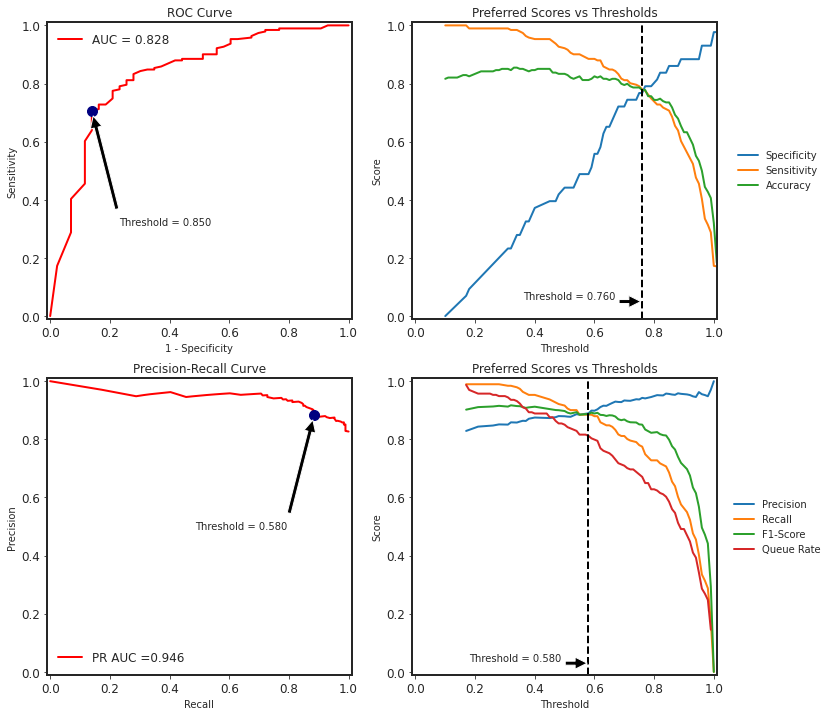

In [16]:
example3.plot()

In [17]:
thresholds = example3.thresholds_dict_
methods = example3.average_methods_

frames = []
for method in methods:
    for threshold in thresholds:
        ex = BinaryClassificationMetrics(y_test, y_pred_proba[:,1], threshold=thresholds[threshold], average_method=method, display_df=False)
        frames.append(ex.metrics_df_)
        
df_to_show = pd.concat(frames)        

In [18]:
# Set CSS properties
th_props = [("font-size", "12px"),
            ("text-align", "left"),
            ("font-weight", "bold")]

td_props = [("font-size", "12px"),
            ("text-align", "center")]

# Set table styles
styles = [dict(selector = "th", props = th_props),
          dict(selector = "td", props = td_props)]

cm = sns.light_palette("blue", as_cmap = True)
display(df_to_show.round(decimals=3).style.background_gradient(cmap = cm).set_table_styles(styles))

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.850 | Average = Binary,0.735000,0.784000,0.828000,0.946000,0.957000,0.707000,0.942000,0.813000,0.746000,0.894000,0.685000,135,37,6,56
Threshold = 0.760 | Average = Binary,0.778000,0.774000,0.828000,0.946000,0.937000,0.780000,0.942000,0.851000,0.807000,0.901000,0.741000,149,33,10,42
Threshold = 0.580 | Average = Binary,0.812000,0.687000,0.828000,0.946000,0.885000,0.885000,0.942000,0.885000,0.885000,0.885000,0.793000,169,21,22,22
Threshold = 0.850 | Average = Weighted,0.735000,0.784000,0.828000,0.946000,0.855000,0.735000,0.942000,0.764000,0.737000,0.812000,0.618000,135,37,6,56
Threshold = 0.760 | Average = Weighted,0.778000,0.774000,0.828000,0.946000,0.846000,0.778000,0.942000,0.798000,0.782000,0.824000,0.677000,149,33,10,42
Threshold = 0.580 | Average = Weighted,0.812000,0.687000,0.828000,0.946000,0.812000,0.812000,0.942000,0.812000,0.812000,0.812000,0.741000,169,21,22,22
Threshold = 0.850 | Average = Macro,0.735000,0.784000,0.828000,0.946000,0.678000,0.784000,0.942000,0.679000,0.722000,0.670000,0.530000,135,37,6,56
Threshold = 0.760 | Average = Macro,0.778000,0.774000,0.828000,0.946000,0.689000,0.774000,0.942000,0.705000,0.738000,0.691000,0.565000,149,33,10,42
Threshold = 0.580 | Average = Macro,0.812000,0.687000,0.828000,0.946000,0.687000,0.687000,0.942000,0.687000,0.687000,0.687000,0.558000,169,21,22,22
Threshold = 0.850 | Average = Micro,0.735000,0.784000,0.828000,0.946000,0.735000,0.735000,0.942000,0.735000,0.735000,0.735000,0.685000,135,37,6,56


## Example 4

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [20]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [21]:
# train a classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [22]:
example4 = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.959000,0.955000,0.992000,0.994000,0.963000,0.972000,0.994000,0.967000,0.970000,0.965000,0.937000,104,60,4,3


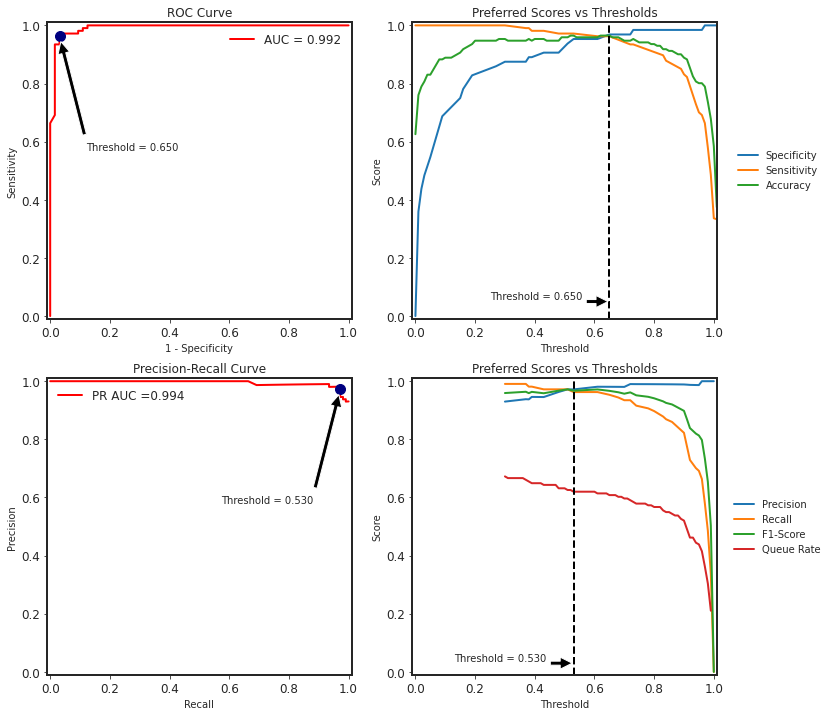

In [23]:
example4.plot()